# Big Data Analysis of Karnataka Agricultural Markets (2012): A PySpark Approach

## Dataset Description

This project analyzes agricultural market arrival data across Karnataka for 2012 using PySpark. The dataset captures market arrivals by district, taluk, market, commodity, date, and units. It supports distributed analysis, enabling scalable cleansing, sampling, and aggregation to extract key trends.
____________________________________________________
| Column          | Description                    |
|-----------------|-------------------------------|
| District Name   | Name of the district           |
| Taluk Name      | Name of the taluk              |
| Market Name     | Name of the market             |
| Address         | Market address                 |
| Telephone       | Market telephone               |
| Commodity       | Commodity traded               |
| Year            | Year of entry                  |
| Month           | Month of entry                 |
| Arrival         | Quantity of commodity          |
| Unit            | Unit of measurement            |
____________________________________________________

# SPARK INSTALLLATION

In [73]:
# 1. Environment Setup
from pyspark.sql import SparkSession

import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("KarnatakaMarketData2012").getOrCreate()


# INSTALLATIONS

In [74]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# LOAD CSV DATA

In [75]:
# 2. Data Loading (CSV)
csv_path = "datafile.csv"  # Make sure your dataset is saved as datafile.csv in your working directory

df = spark.read.option("header", True).csv(csv_path)
df.show(5)
df.printSchema()


+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|Commodity|Year|Month|Arrival|      Unit|
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Bajra|2012|  Jan|    242|Quintal   |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|   Bull  |2012|  Jan|     65|  Numbers |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Cow  |2012|  Jan|    151|  Numbers |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|   Goat  |2012|  Jan|    492|  Numbers |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Groundnut|2012|  Jan|    364|Quintal   |
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+----------+
only showi

# DATA CLEANING

In [76]:
# 3. Data Cleaning: Remove leading/trailing spaces, handle NA
from pyspark.sql.functions import trim, col
for c in df.columns:
    df = df.withColumn(c, trim(df[c]))

df = df.dropna(subset=["District Name","Taluk Name","Market Name","Commodity","Arrival","Unit"])
# Convert to integer (arrival may be string!)
df = df.withColumn("Arrival_int", col("Arrival").cast("int"))
df = df.dropna(subset=["Arrival_int"])
df.show(5)


+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Bajra|2012|  Jan|    242|Quintal|        242|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Bull|2012|  Jan|     65|Numbers|         65|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|      Cow|2012|  Jan|    151|Numbers|        151|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Goat|2012|  Jan|    492|Numbers|        492|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Groundnut|2012|  Jan|    364|Quintal|        364|
+-------------+----------+-----------+----------

# Display Schema & Sample Data

In [77]:
df.printSchema()
df.describe().show()

root
 |-- District Name: string (nullable = true)
 |-- Taluk Name: string (nullable = true)
 |-- Market Name: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Telephone: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Arrival: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Arrival_int: integer (nullable = true)

+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|summary| District Name|Taluk Name|Market Name|             Address|           Telephone|    Commodity|  Year|Month|           Arrival|     Unit|       Arrival_int|
+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|  count|         21421|     21421|      21421|         

In [78]:
df.count()   

21421

In [79]:
len(df.columns) 

11

# List Of Columns

In [80]:
df.columns    

['District Name',
 'Taluk Name',
 'Market Name',
 'Address',
 'Telephone',
 'Commodity',
 'Year',
 'Month',
 'Arrival',
 'Unit',
 'Arrival_int']

# Show 10 Rows (Untruncated)

In [81]:
df.show(10, truncate=False)

+-------------+----------+-----------+-------------------------------+---------+----------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|Address                        |Telephone|Commodity |Year|Month|Arrival|Unit   |Arrival_int|
+-------------+----------+-----------+-------------------------------+---------+----------+----+-----+-------+-------+-----------+
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Bajra     |2012|Jan  |242    |Quintal|242        |
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Bull      |2012|Jan  |65     |Numbers|65         |
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Cow       |2012|Jan  |151    |Numbers|151        |
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Goat      |2012|Jan  |492    |Numbers|492        |
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Gro

In [82]:
df.printSchema()                     # 5. Schema


root
 |-- District Name: string (nullable = true)
 |-- Taluk Name: string (nullable = true)
 |-- Market Name: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Telephone: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Arrival: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Arrival_int: integer (nullable = true)



# Describe Summary

In [83]:
df.describe().show() 

+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|summary| District Name|Taluk Name|Market Name|             Address|           Telephone|    Commodity|  Year|Month|           Arrival|     Unit|       Arrival_int|
+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|  count|         21421|     21421|      21421|               21421|               21421|        21421| 21421|21421|             21421|    21421|             21421|
|   mean|          NULL|      NULL|       NULL|                NULL| 6.129803628281474E9|         NULL|2012.0| NULL|33677.881378086924|     NULL|33677.881378086924|
| stddev|          NULL|      NULL|       NULL|                NULL|3.6088738750575686E9|         NULL|   0.0| NULL| 424756.2496743729|     NULL| 424756.2496743729|
|    min| 

# Summary Stats

In [84]:
df.summary().show()  

+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|summary| District Name|Taluk Name|Market Name|             Address|           Telephone|    Commodity|  Year|Month|           Arrival|     Unit|       Arrival_int|
+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|  count|         21421|     21421|      21421|               21421|               21421|        21421| 21421|21421|             21421|    21421|             21421|
|   mean|          NULL|      NULL|       NULL|                NULL| 6.129803628281474E9|         NULL|2012.0| NULL|33677.881378086924|     NULL|33677.881378086924|
| stddev|          NULL|      NULL|       NULL|                NULL|3.6088738750575686E9|         NULL|   0.0| NULL| 424756.2496743729|     NULL| 424756.2496743729|
|    min| 

In [85]:
df.distinct().count()  

21421

# Drop Duplicates and Count

In [86]:
df.dropDuplicates().count()

21421

In [87]:
df.dropDuplicates(["District Name"]).count() 

29

In [88]:
df.select("District Name").distinct().show(5)  # 12. Distinct values


+-------------+
|District Name|
+-------------+
|      Raichur|
|       Mysore|
|     Gulbarga|
|   Davanagere|
|     Ramnagar|
+-------------+
only showing top 5 rows



# Filter Rows by Condition

In [89]:
df.filter(col("Arrival") > 100).show(5)    


+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Bajra|2012|  Jan|    242|Quintal|        242|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|      Cow|2012|  Jan|    151|Numbers|        151|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Goat|2012|  Jan|    492|Numbers|        492|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Groundnut|2012|  Jan|    364|Quintal|        364|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Maize|2012|  Jan|  21669|Quintal|      21669|
+-------------+----------+-----------+----------

# Filter Quantity

In [90]:
df.filter(col("Arrival") == 0).show(5)  


+-------------+----------+-----------+--------------------+-----------+---------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|  Telephone|Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+-----------+---------+----+-----+-------+-------+-----------+
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|  Jaggery|2012|  Jan|      0|Quintal|          0|
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|    Bajra|2012|  Aug|      0|Quintal|          0|
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|  Jaggery|2012|  Sep|      0|Quintal|          0|
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|  Jaggery|2012|  Oct|      0|Quintal|          0|
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|  Jaggery|2012|  Nov|      0|Quintal|          0|
+-------------+----------+------

# filter description

In [91]:
df.filter(col("District Name").isNull()).show() 



+-------------+----------+-----------+-------+---------+---------+----+-----+-------+----+-----------+
|District Name|Taluk Name|Market Name|Address|Telephone|Commodity|Year|Month|Arrival|Unit|Arrival_int|
+-------------+----------+-----------+-------+---------+---------+----+-----+-------+----+-----------+
+-------------+----------+-----------+-------+---------+---------+----+-----+-------+----+-----------+



In [92]:
pdf = df.toPandas()

df_sorted = pdf.sort_values(by="Arrival", ascending=False)
df_sorted.head(10)


,District Name,Taluk Name,Market Name,Address,Telephone,Commodity,Year,Month,Arrival,Unit,Arrival_int
1091,Bangalore Urban•,Bangalore North,BANGALORE,"MAHATMA GANDHI COMPLEX, BANGALORE 560 022",08023372280,Jaggery,2012,Aug,9999,Quintal,9999
5131,Chickballapur,Bagepalli,BAGEPALLI,AGRICULTURAL PRODUCE MARKET COMMITTEE BAGEPALLI,08150282708,Tomato,2012,Jun,9997,Quintal,9997
3279,Bellary,Hospet,HOSPET,DAM ROAD HOSPET,231652,Tomato,2012,Jan,999,Quintal,999
13611,Kolar,Kolar,KOLAR,KOLAR BANGALORE BYEPASS ROAD KOLAR,08152210090,Cauliflower,2012,Oct,999,Quintal,999
884,Bangalore Urban•,Bangalore North,BANGALORE,"MAHATMA GANDHI COMPLEX, BANGALORE 560 022",08023372280,Jaggery,2012,Mar,9988,Quintal,9988
6531,Chickmagalur,Chikmagalur,CHICKAMAGLUR,SECRETARY APMC JYOTHI NAGAR CHICKMAGALUR 577102,08262220709,Brinjal,2012,Nov,998,Quintal,998
4639,Chamarajanagar,Gundlupet,GUNDLUPET,OOTY MYSORE ROAD GUNDLUPET CHAMARAJANAGAR DIS...,08229222215,Cotton,2012,Jan,998,Quintal,998
13878,Kolar,Malur,MALUR,"RATHNA NILAYA, BEHIND NANJAMMA HOSPITAL MARUT...",08151232239,Raddish,2012,Jul,997,Quintal,997
19616,Tumukur,Chiknayakanhalli,HULIYAR,B H ROAD HULIYAR,08133 256042,Copra,2012,Aug,997,Quintal,997
6545,Chickmagalur,Chikmagalur,CHICKAMAGLUR,SECRETARY APMC JYOTHI NAGAR CHICKMAGALUR 577102,08262220709,Potato,2012,Nov,997,Quintal,997


# Drop Null

In [93]:
df.na.drop().count()               


21421

# Replace null with 0

In [94]:
df.na.fill({"Address":0}).show(5)  

+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Bajra|2012|  Jan|    242|Quintal|        242|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Bull|2012|  Jan|     65|Numbers|         65|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|      Cow|2012|  Jan|    151|Numbers|        151|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Goat|2012|  Jan|    492|Numbers|        492|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Groundnut|2012|  Jan|    364|Quintal|        364|
+-------------+----------+-----------+----------

# Number of rows and columns

In [95]:
print(f"Total Rows: {df.count()}")
print(f"Total Columns: {len(df.columns)}")

Total Rows: 21421
Total Columns: 11


# RDD Transformations

In [96]:
from pyspark.sql.functions import col, lit, rand, monotonically_increasing_id

df_cleaned = df.withColumn(
    "Arrival_float", col("Arrival").cast("double")
)

df_cleaned = df_cleaned.filter(col("Arrival_float").isNotNull())

commodity_arrival_list = df_cleaned.select(
    "Commodity", "Arrival_float"
).limit(5).collect()

print("--- Equivalent to RDD Map and Take (Top 5) ---")

print([(row.Commodity, row.Arrival_float) for row in commodity_arrival_list])

sampled_rows = df_cleaned.sample(False, 0.01, seed=42).limit(5)

print("\n--- Equivalent to RDD takeSample (5 Rows) ---")
sampled_rows.select("Commodity", "Arrival_float").show(5, truncate=False)

first_rows = df_cleaned.limit(5)

print("\n--- Equivalent to RDD Take (First 5 Rows) ---")
first_rows.select("Commodity", "Arrival_float").show(5, truncate=False)

--- Equivalent to RDD Map and Take (Top 5) ---
[('Bajra', 242.0), ('Bull', 65.0), ('Cow', 151.0), ('Goat', 492.0), ('Groundnut', 364.0)]

--- Equivalent to RDD takeSample (5 Rows) ---
+----------+-------------+
|Commodity |Arrival_float|
+----------+-------------+
|Onion     |12757.0      |
|Cowpea    |50.0         |
|He Baffalo|5.0          |
|Beans     |51.0         |
|Onion     |1110045.0    |
+----------+-------------+


--- Equivalent to RDD Take (First 5 Rows) ---
+---------+-------------+
|Commodity|Arrival_float|
+---------+-------------+
|Bajra    |242.0        |
|Bull     |65.0         |
|Cow      |151.0        |
|Goat     |492.0        |
|Groundnut|364.0        |
+---------+-------------+



# DATAFRAME SAMPLING

In [97]:
# 5. DataFrame Sampling
df_sample = df.sample(False, 0.05, seed=42)
df_sample.show(5)


+-------------+----------+-----------+--------------------+---------+-------------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|    Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+---------+-------------+----+-----+-------+-------+-----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|        Bajra|2012|  Feb|   2872|Quintal|       2872|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Alasande Gram|2012|  Jun|    206|Quintal|        206|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|  She Baffalo|2012|  Jun|    357|Numbers|        357|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     She Goat|2012|  Jul|   1535|Numbers|       1535|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|          Cow|2012|  Aug|    278|Numbers|        278|
+-------------+-

# SELECTING COULMNS

In [98]:
# 6. Exploring Structure, Selecting Columns, and Analytical Operations
print(df.columns)
df.select("Commodity", "Arrival_int").show(5)

df.groupBy("Commodity").sum("Arrival_int").orderBy("sum(Arrival_int)", ascending=False).show(10)
df.groupBy("District Name").sum("Arrival_int").orderBy("sum(Arrival_int)", ascending=False).show(10)


['District Name', 'Taluk Name', 'Market Name', 'Address', 'Telephone', 'Commodity', 'Year', 'Month', 'Arrival', 'Unit', 'Arrival_int']
+---------+-----------+
|Commodity|Arrival_int|
+---------+-----------+
|    Bajra|        242|
|     Bull|         65|
|      Cow|        151|
|     Goat|        492|
|Groundnut|        364|
+---------+-----------+
only showing top 5 rows

+--------------+----------------+
|     Commodity|sum(Arrival_int)|
+--------------+----------------+
|       Coconut|       397821985|
|Tender Coconut|       226740122|
|         Paddy|        18554513|
|         Maize|        15460281|
|         Onion|         9826018|
|          Rice|         9159688|
|        Potato|         4467185|
|  Green Ginger|         2952505|
|        Cotton|         2861896|
|        Tomato|         2858265|
+--------------+----------------+
only showing top 10 rows

+----------------+----------------+
|   District Name|sum(Arrival_int)|
+----------------+----------------+
|          MAN

# FILTER AND GROUPBY

In [99]:
# 7. Filter and GroupBy Example
df_maize = df.filter(df.Commodity == "Maize")
df_maize.groupBy("Month").sum("Arrival_int").orderBy("Month").show()


+-----+----------------+
|Month|sum(Arrival_int)|
+-----+----------------+
|  Apr|         1163594|
|  Aug|          485482|
|  Dec|         2389289|
|  Feb|         2102362|
|  Jan|         1652550|
|  Jul|          605887|
|  Jun|          622085|
|  Mar|         1449585|
|  May|         2430482|
|  Nov|         1291537|
|  Oct|          649746|
|  Sep|          617682|
+-----+----------------+



In [100]:
from pyspark.sql.functions import trim, col
import pandas as pd
import matplotlib.pyplot as plt

# Clean trimming
for c in df.columns:
    df = df.withColumn(c, trim(df[c]))

# Drop rows with nulls in key columns
df = df.dropna(subset=["District Name", "Taluk Name", "Market Name", "Commodity", "Arrival", "Unit"])

# Filter out non-numeric Arrival values and cast to int
df = df.filter(col("Arrival").cast("int").isNotNull())
df = df.withColumn("Arrival_int", col("Arrival").cast("int"))
df = df.dropna(subset=["Arrival_int"])

# Convert to pandas
pdf = df.select("Commodity", "Arrival_int", "District Name").toPandas()
pdf['Arrival_int'] = pd.to_numeric(pdf['Arrival_int'], errors='coerce')
pdf = pdf.dropna(subset=['Arrival_int'])



# Visualization Section

# Top 10 Commodities by Total Arrival (Bar Chart)

commodity_totals dtype: int32
commodity_totals:
 Commodity
Coconut           397821985
Tender Coconut    226740122
Paddy              18554513
Maize              15460281
Onion               9826018
Rice                9159688
Potato              4467185
Green Ginger        2952505
Cotton              2861896
Tomato              2858265
Name: Arrival_int, dtype: int32


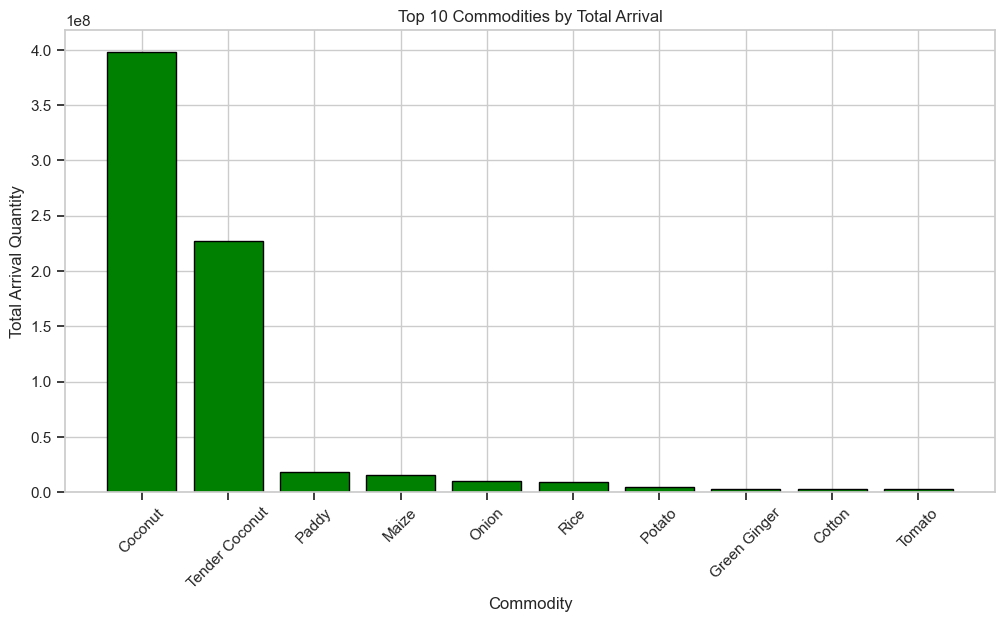

In [101]:
# 2. Top 10 Commodities by Total Arrival (Bar Chart)
commodity_totals = pdf.groupby('Commodity')['Arrival_int'].sum().sort_values(ascending=False).head(10)
print("commodity_totals dtype:", commodity_totals.dtype)
print("commodity_totals:\n", commodity_totals)

plt.figure(figsize=(12,6))
plt.bar(commodity_totals.index, commodity_totals.values, color='green', edgecolor='black')
plt.title('Top 10 Commodities by Total Arrival')
plt.xlabel('Commodity')
plt.ylabel('Total Arrival Quantity')
plt.xticks(rotation=45)
plt.show()



# Scatter Plot: Arrival Quantity vs Commodity

# Literacy Rate Analysis

In [102]:
import pandas as pd
df = pd.read_csv("datafile.csv")
grand_total_arrival = df['Arrival'].sum()
num_districts = df['District Name'].nunique()
df_district_agg = df.groupby('District Name')['Arrival'].sum()
avg_arrival_per_district = df_district_agg.mean()

print(f"Grand Total Commodity Arrival: {grand_total_arrival:,.0f}")
print(f"Number of Districts: {num_districts:,}")
print(f"Average Arrival per District: {avg_arrival_per_district:,.2f}")

Grand Total Commodity Arrival: 721,413,897
Number of Districts: 29
Average Arrival per District: 24,876,341.28


#  Scheduled Caste Analysis

# Equivalent to Literacy Rate Visualization (Bar Plot)

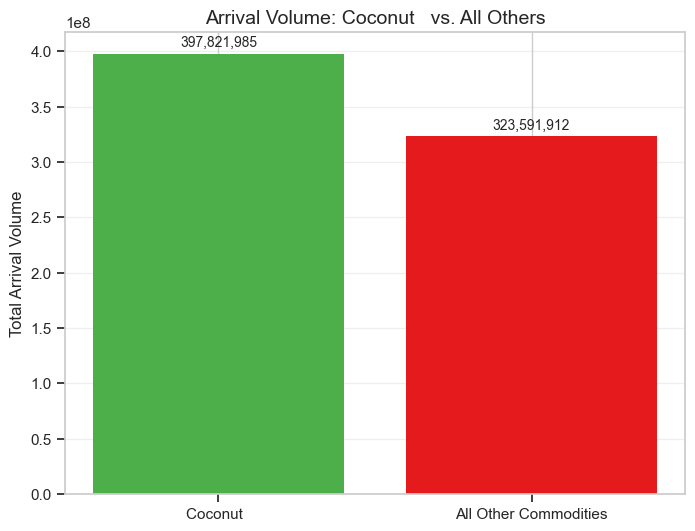

In [103]:
df_agg = df.groupby('Commodity')['Arrival'].sum().reset_index()
top_commodity_row = df_agg.sort_values(by='Arrival', ascending=False).iloc[0]
top_commodity_name = top_commodity_row['Commodity']
top_commodity_arrival = top_commodity_row['Arrival']
grand_total_arrival = df_agg['Arrival'].sum()
other_commodities_arrival = grand_total_arrival - top_commodity_arrival

categories = [top_commodity_name, 'All Other Commodities']
values = [top_commodity_arrival, other_commodities_arrival]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['#4daf4a', '#e41a1c']) # Green for top, Red for others

plt.title(f'Arrival Volume: {top_commodity_name} vs. All Others', fontsize=14)
plt.ylabel('Total Arrival Volume')
plt.grid(axis='y', alpha=0.3)

for bar, v in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() * 1.01, 
             f'{v:,.0f}', 
             ha='center', 
             va='bottom',
             fontsize=10)
plt.show()

# Equivalent to Literacy Rate Calculation

In [104]:
grand_total_arrival = df['Arrival'].sum()
num_districts = df['District Name'].nunique()
df_district_agg = df.groupby('District Name')['Arrival'].sum()
avg_arrival_per_district = df_district_agg.mean()


print(f"Grand Total Commodity Arrival: {grand_total_arrival:,.0f}")
print(f"Number of Districts: {num_districts:,}")
print(f"Average Arrival per District: {avg_arrival_per_district:,.2f}")

Grand Total Commodity Arrival: 721,413,897
Number of Districts: 29
Average Arrival per District: 24,876,341.28


# Equivalent to Filtering for 'Scheduled Caste'

In [105]:
top_commodity_data = df[df['Commodity'].str.contains('Coconut', na=False, case=False)]

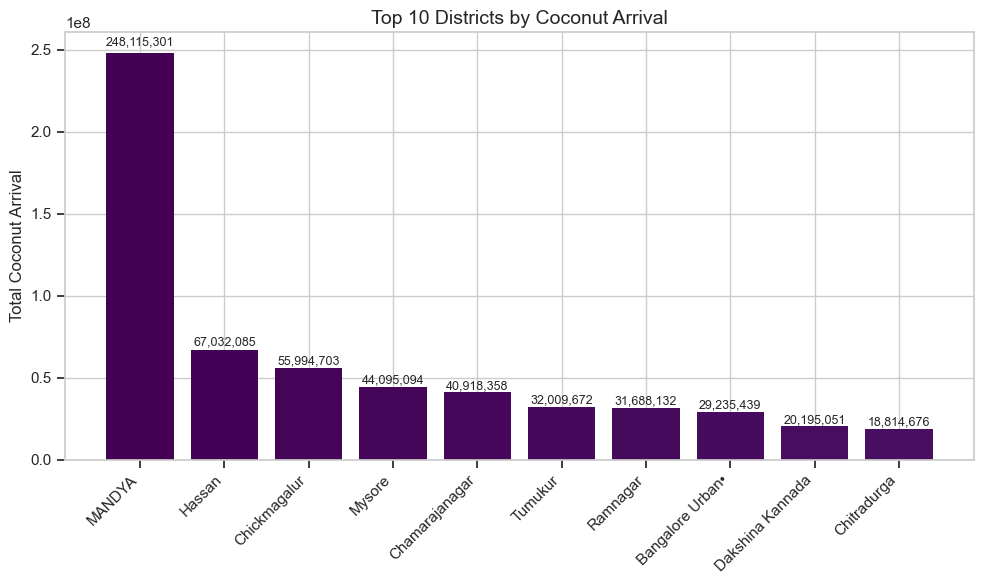

In [106]:
top_commodity_data = df[df['Commodity'].str.contains('Coconut', na=False, case=False)]
df_coconut_agg = top_commodity_data.groupby('District Name')['Arrival'].sum().sort_values(ascending=False).reset_index()
df_top10_coconut = df_coconut_agg.head(10)
categories = df_top10_coconut['District Name']
values = df_top10_coconut['Arrival']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=plt.cm.viridis(range(len(categories)))) 
plt.title(f'Top 10 Districts by Coconut Arrival', fontsize=14)
plt.ylabel('Total Coconut Arrival')
plt.xticks(rotation=45, ha='right')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height * 1.01,
             f'{height:,.0f}', 
             ha='center', 
             va='bottom',
             fontsize=9) 

plt.tight_layout()
plt.show()

 # Heatmap Style Visualization

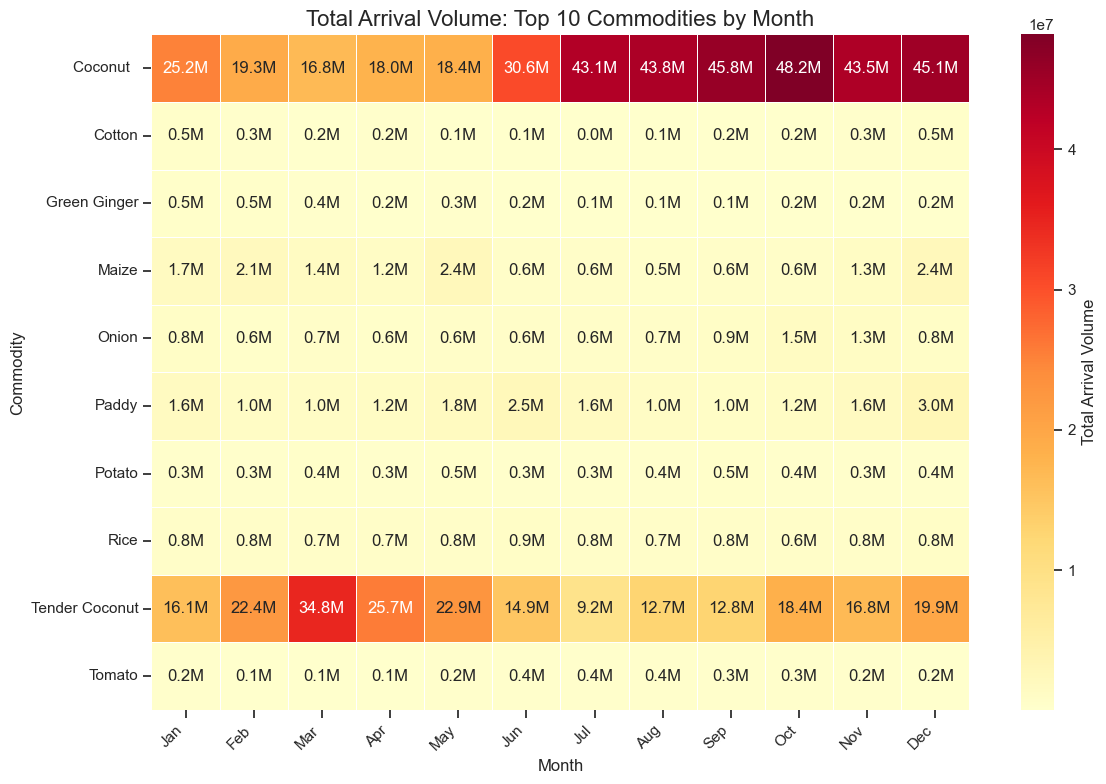

In [107]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
top_10_commodities = df.groupby('Commodity')['Arrival'].sum().nlargest(10).index
df_filtered = df[df['Commodity'].isin(top_10_commodities)].copy()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_filtered['Month'] = pd.Categorical(df_filtered['Month'],
                                      categories=month_order,
                                      ordered=True)

df_pivot = df_filtered.pivot_table(index='Commodity',
                                   columns='Month',
                                   values='Arrival',
                                   aggfunc='sum',
                                   fill_value=0,
                                   observed=False)

df_annot = (df_pivot / 1_000_000).map(lambda x: f'{x:.1f}M')

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df_pivot,
            cmap='YlOrRd',          # Color palette
            annot=df_annot,         # Annotate with formatted values
            fmt='s',                # Treat annotations as strings
            linewidths=0.5,
            ax=ax,
            cbar_kws={'label': 'Total Arrival Volume'})

ax.set_title("Total Arrival Volume: Top 10 Commodities by Month", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Commodity")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Keep Y-labels horizontal
plt.xticks(rotation=45, ha='right')

# --- Layout Adjustment & Display ---
fig.tight_layout()
plt.show()


In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a Pandas DataFrame
df = pd.read_csv("datafile.csv")

# 1. Clean 'Arrival' column (Pandas equivalent of PySpark cast and filter)
df['Arrival'] = pd.to_numeric(df['Arrival'], errors='coerce')
df_cleaned = df.dropna(subset=['Arrival']).copy()

# 2. Add 'Total Arrival' for convenience
df_cleaned.rename(columns={'Arrival': 'Arrival_float'}, inplace=True)

# 3. Define Top 10 Commodities for filtering in later plots
df_agg_commodity = df_cleaned.groupby('Commodity')['Arrival_float'].sum().sort_values(ascending=False)
top_10_commodities = df_agg_commodity.head(10).index.tolist()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 1. Top 10 Districts by Total Commodity Arrival (Volume in Millions

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\2506242459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10_pd, x='Total Arrival', y='District Name', palette="viridis")
C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\2506242459.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


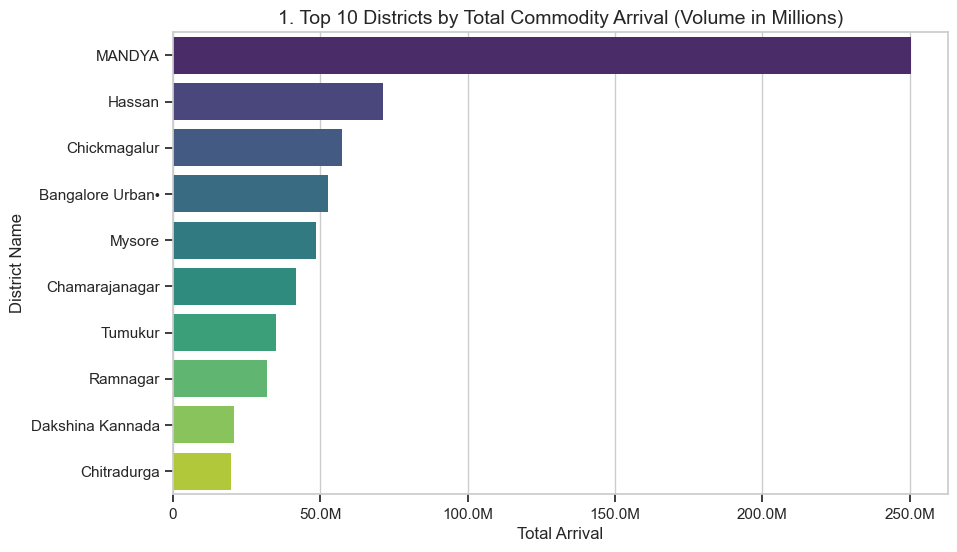

In [109]:
df_top10_pd = df_cleaned.groupby('District Name')['Arrival_float'].sum().sort_values(ascending=False).head(10).reset_index(name='Total Arrival')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_top10_pd, x='Total Arrival', y='District Name', palette="viridis")
ax = plt.gca()
x_tick_labels = [f'{x/1e6:,.1f}M' if x > 0 else '0' for x in ax.get_xticks()]
ax.set_xticklabels(x_tick_labels)
plt.title("1. Top 10 Districts by Total Commodity Arrival (Volume in Millions)", fontsize=14)
plt.show()

# 2. Distribution of Top 5 Commodities by Total Arrival

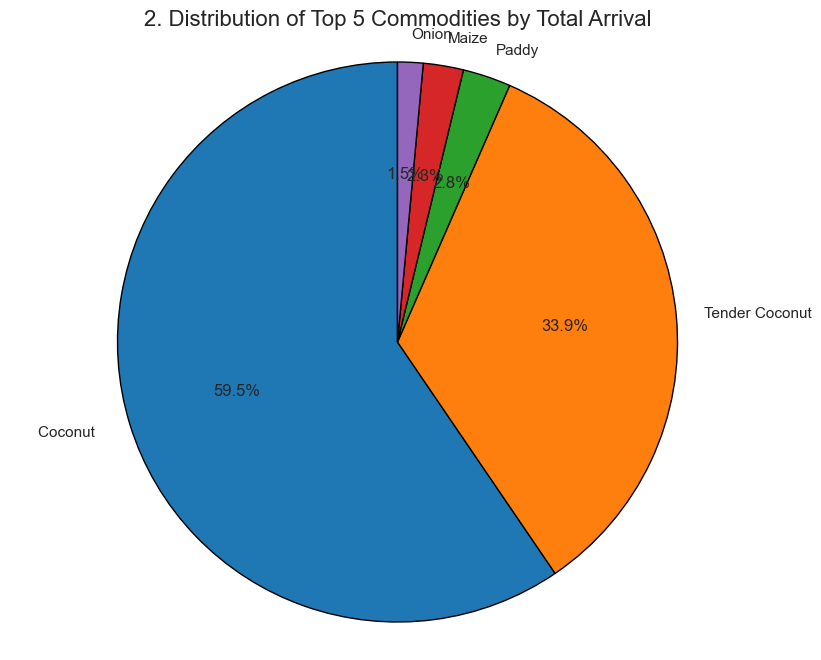

In [110]:
df_top5_pd = df_agg_commodity.head(5).reset_index(name='Total Arrival')

plt.figure(figsize=(10, 8))
plt.pie(df_top5_pd['Total Arrival'], 
        labels=df_top5_pd['Commodity'], 
        autopct='%1.1f%%', 
        startangle=90,
        wedgeprops={'edgecolor': 'black'})
plt.title('2. Distribution of Top 5 Commodities by Total Arrival', fontsize=16)
plt.axis('equal')
plt.show()

# 3. Total Arrival Volume by Month (Millions)

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\555226714.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_tick_labels)


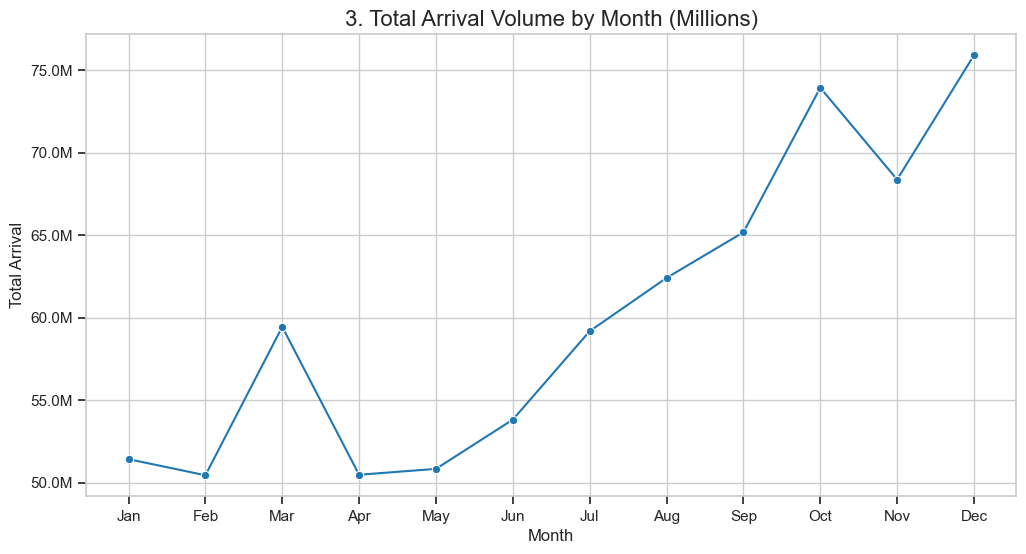

In [111]:
df_time_pd = df_cleaned.groupby('Month')['Arrival_float'].sum().reindex(month_order).reset_index(name='Total Arrival')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time_pd, x='Month', y='Total Arrival', marker='o')
ax = plt.gca()
y_tick_labels = [f'{y/1e6:,.1f}M' if y >= 0 else '0' for y in ax.get_yticks()]
ax.set_yticklabels(y_tick_labels)
plt.title("3. Total Arrival Volume by Month (Millions)", fontsize=16)
plt.show()

# 4. Total Arrival Volume: Top 10 Commodities by Month (Heatmap)

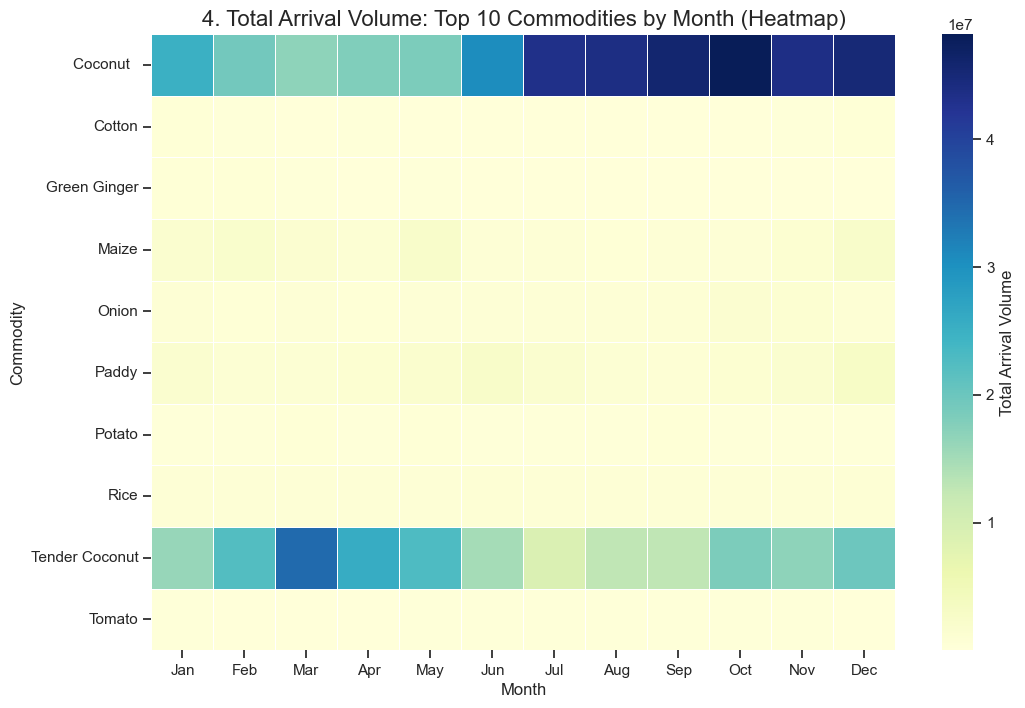

In [112]:
df_pivot_pd = df_cleaned[df_cleaned['Commodity'].isin(top_10_commodities)].pivot_table(
    index='Commodity', columns='Month', values='Arrival_float', aggfunc='sum'
).reindex(columns=month_order).fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot_pd, cmap='YlGnBu', fmt='.0f', linewidths=.5, cbar_kws={'label': 'Total Arrival Volume'})
plt.title("4. Total Arrival Volume: Top 10 Commodities by Month (Heatmap)", fontsize=16)
plt.show()

# 5. Average Arrival vs. Market Count (Commodity Distribution)

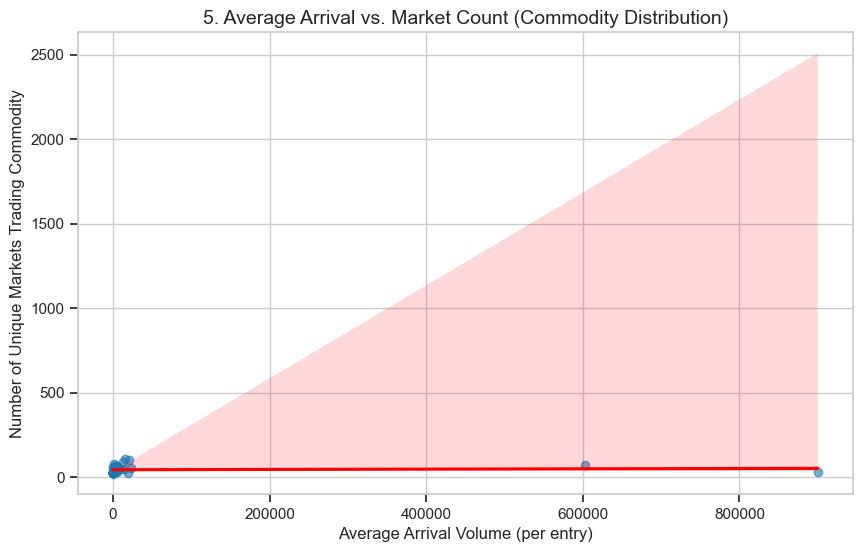

In [113]:
df_metrics = df_cleaned.groupby('Commodity').agg(
    Average_Arrival=('Arrival_float', 'mean'),
    Market_Count=('Market Name', 'nunique')
).sort_values(by='Market_Count', ascending=False).head(50).reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=df_metrics, x="Average_Arrival", y="Market_Count", scatter_kws={"alpha":0.6}, line_kws={"color": "red"})
plt.title("5. Average Arrival vs. Market Count (Commodity Distribution)", fontsize=14)
plt.xlabel("Average Arrival Volume (per entry)")
plt.ylabel("Number of Unique Markets Trading Commodity")
plt.show()

# 6. Arrival Volume Distribution for Top 4 Commodities

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\1046384692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Commodity', y='Arrival_float', data=df_violin_pd_filtered, palette='Set2', inner='quartile')


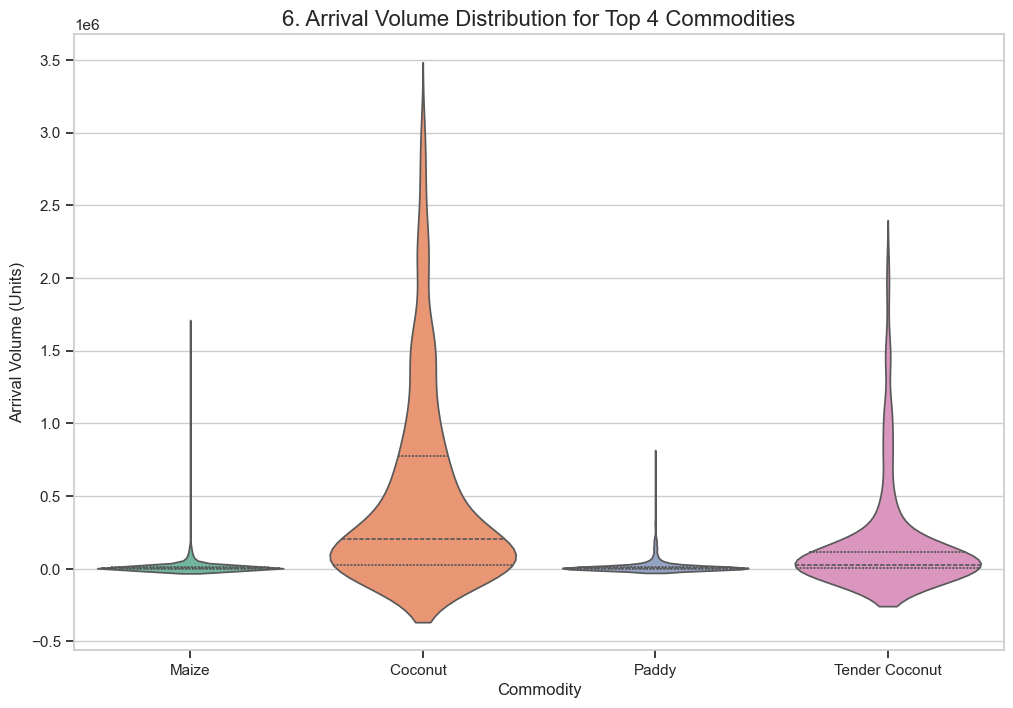

In [114]:
top_4_commodities = top_10_commodities[:4]
df_violin_pd = df_cleaned[df_cleaned['Commodity'].isin(top_4_commodities)].copy()
df_violin_pd_filtered = df_violin_pd[df_violin_pd['Arrival_float'] < df_violin_pd['Arrival_float'].quantile(0.99)] 

plt.figure(figsize=(12, 8))
sns.violinplot(x='Commodity', y='Arrival_float', data=df_violin_pd_filtered, palette='Set2', inner='quartile')
plt.title('6. Arrival Volume Distribution for Top 4 Commodities', fontsize=16)
plt.ylabel('Arrival Volume (Units)')
plt.show()

# 7. Top 15 Markets by Commodity Diversity

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\3350833264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_market_diversity_pd, x="Unique Commodity Count", y="Market Name", palette="Spectral")


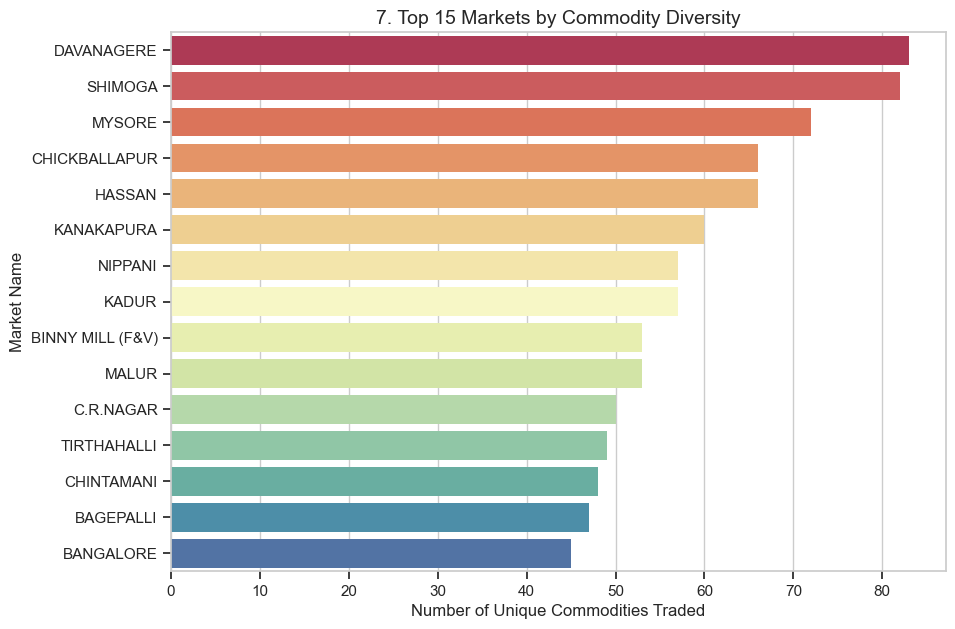

In [115]:
df_market_diversity_pd = df_cleaned.groupby('Market Name')['Commodity'].nunique().sort_values(ascending=False).head(15).reset_index(name='Unique Commodity Count')

plt.figure(figsize=(10, 7))
sns.barplot(data=df_market_diversity_pd, x="Unique Commodity Count", y="Market Name", palette="Spectral")
plt.title("7. Top 15 Markets by Commodity Diversity", fontsize=14)
plt.xlabel("Number of Unique Commodities Traded")
plt.show()

# 8. Distribution of Arrival Volumes (Excluding Top 1% Outliers)

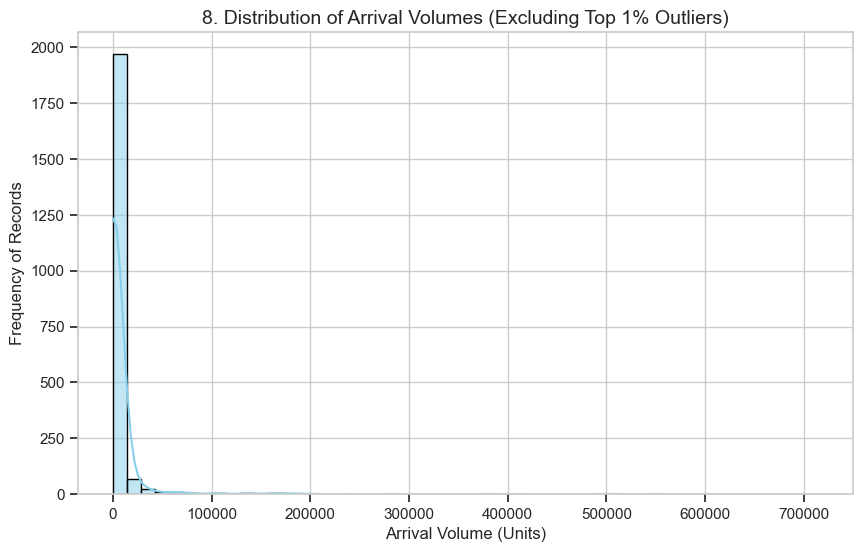

In [116]:
df_hist_pd = df_cleaned.sample(frac=0.1, random_state=42).copy()
df_hist_pd = df_hist_pd[df_hist_pd['Arrival_float'] < df_hist_pd['Arrival_float'].quantile(0.99)]

plt.figure(figsize=(10, 6))
sns.histplot(df_hist_pd['Arrival_float'], bins=50, kde=True, color='skyblue')
plt.title("8. Distribution of Arrival Volumes (Excluding Top 1% Outliers)", fontsize=14)
plt.xlabel("Arrival Volume (Units)")
plt.ylabel("Frequency of Records")
plt.show()

# 9. Top 10 Taluks by Total Commodity Arrival

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\3245744693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_taluk_top10_pd, x="Taluk Name", y="Total Arrival", palette="cividis")


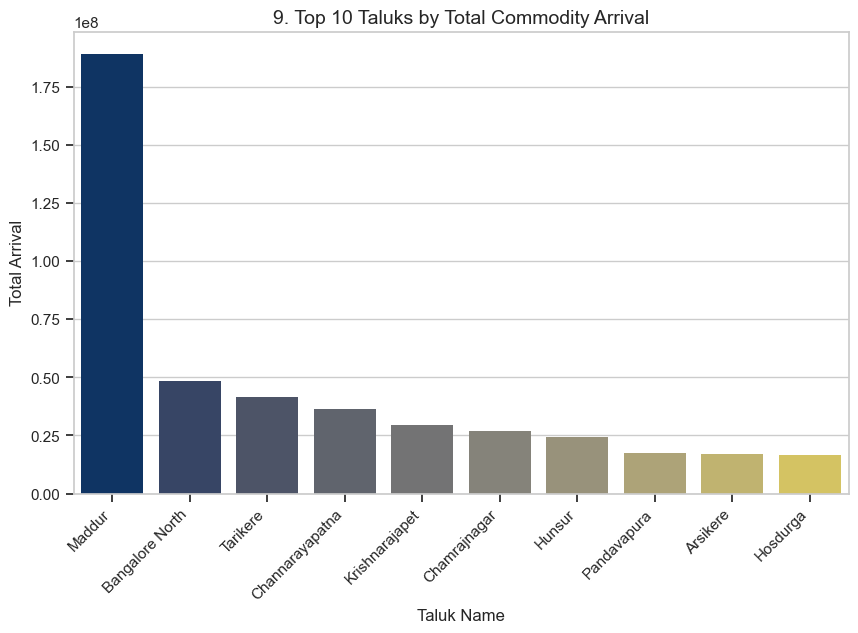

In [117]:
df_taluk_top10_pd = df_cleaned.groupby('Taluk Name')['Arrival_float'].sum().sort_values(ascending=False).head(10).reset_index(name='Total Arrival')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_taluk_top10_pd, x="Taluk Name", y="Total Arrival", palette="cividis")
plt.title("9. Top 10 Taluks by Total Commodity Arrival", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

# 10. Arrival Volume Distribution Across Top 10 Units

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\1745373239.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Unit', y='Arrival_float', data=df_unit_pd_filtered, palette="tab10")


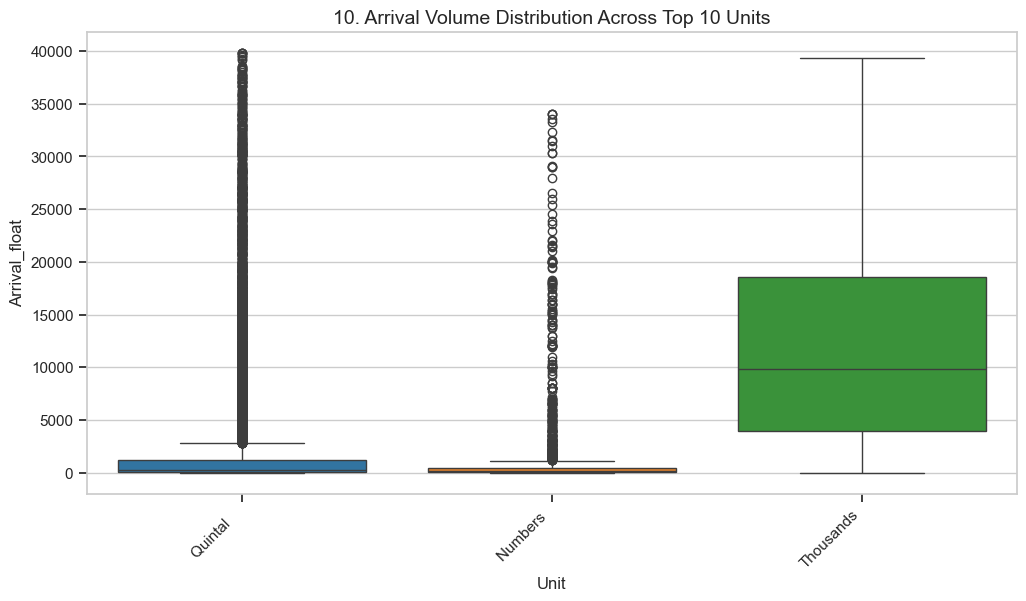

In [118]:
top_10_units = df_cleaned['Unit'].value_counts().head(10).index.tolist()
df_unit_pd = df_cleaned[df_cleaned['Unit'].isin(top_10_units)].copy()
df_unit_pd_filtered = df_unit_pd[df_unit_pd['Arrival_float'] < df_unit_pd['Arrival_float'].quantile(0.95)] 

plt.figure(figsize=(12, 6))
sns.boxplot(x='Unit', y='Arrival_float', data=df_unit_pd_filtered, palette="tab10")
plt.title("10. Arrival Volume Distribution Across Top 10 Units", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

# 11. Distribution of Market Reporting Activity (Record Count)

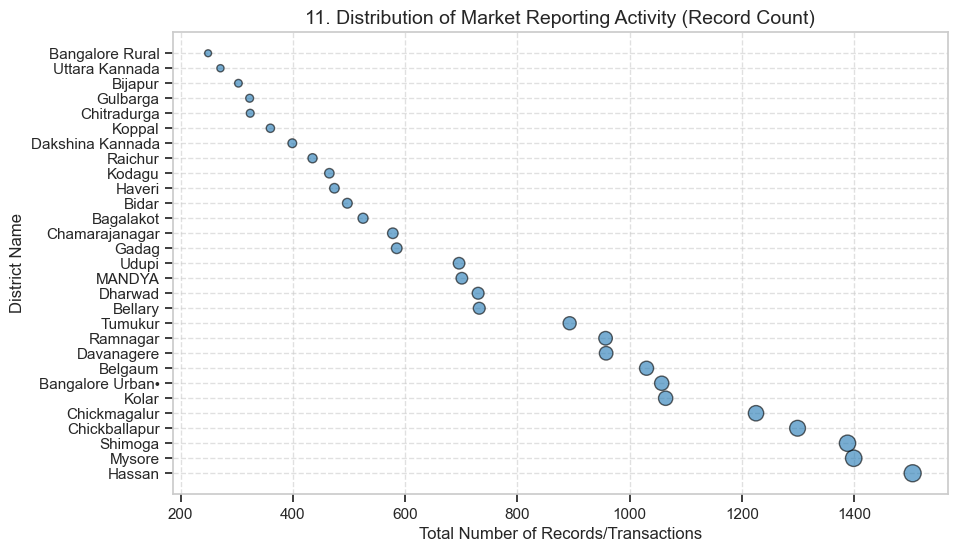

In [119]:
df_records_pd = df_cleaned.groupby('District Name').size().sort_values(ascending=False).reset_index(name='Record Count')

plt.figure(figsize=(10, 6))
plt.scatter(x=df_records_pd['Record Count'], 
            y=df_records_pd['District Name'], 
            s=df_records_pd['Record Count'] / 10,
            alpha=0.6, 
            edgecolors='k')
plt.title("11. Distribution of Market Reporting Activity (Record Count)", fontsize=14)
plt.xlabel("Total Number of Records/Transactions")
plt.ylabel("District Name")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 12. Monthly Arrival Trend for Top 3 Commodities

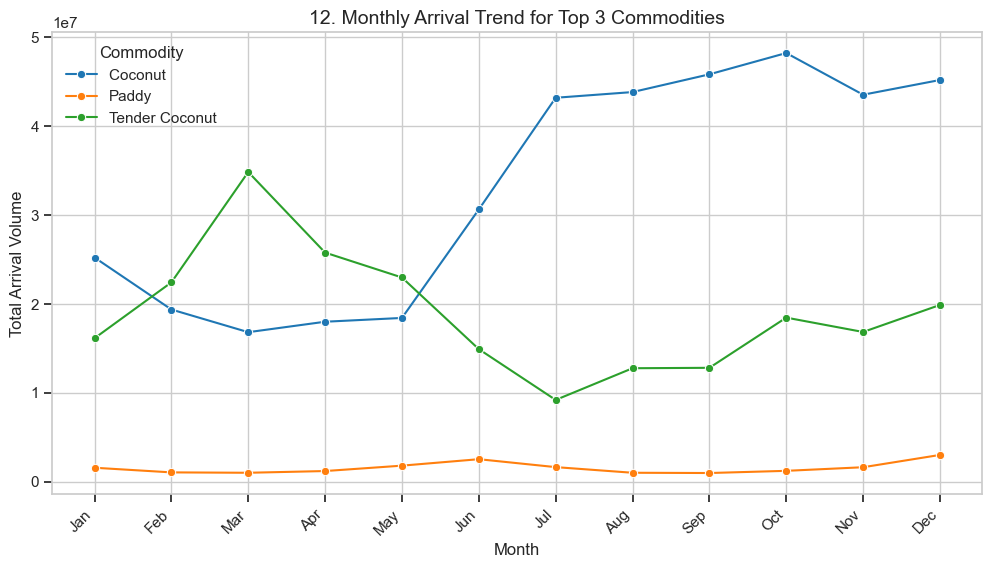

In [120]:
top_3_commodities = top_10_commodities[:3]
df_monthly_3_pd = df_cleaned[df_cleaned['Commodity'].isin(top_3_commodities)].groupby(['Month', 'Commodity'])['Arrival_float'].sum().reindex(month_order, level=0).reset_index(name='Total Arrival')
df_monthly_3_pd['Month'] = pd.Categorical(df_monthly_3_pd['Month'], categories=month_order, ordered=True)
df_monthly_3_pd = df_monthly_3_pd.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_3_pd, x='Month', y='Total Arrival', hue='Commodity', marker='o')
plt.title("12. Monthly Arrival Trend for Top 3 Commodities", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Arrival Volume")
plt.xticks(rotation=45, ha='right')
plt.show()

# 13. District Market Density vs. Average Transaction Size

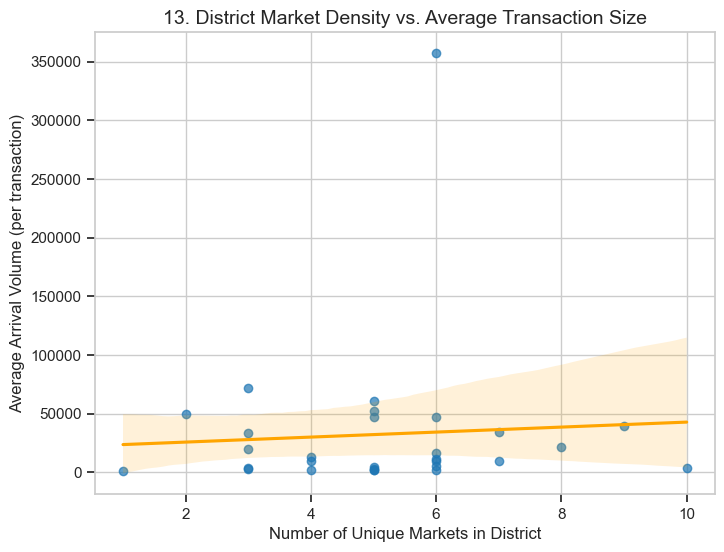

In [121]:
df_district_metrics = df_cleaned.groupby('District Name').agg(
    Average_Arrival=('Arrival_float', 'mean'),
    Market_Count=('Market Name', 'nunique')
).reset_index()

plt.figure(figsize=(8, 6))
sns.regplot(data=df_district_metrics, x="Market_Count", y="Average_Arrival", scatter_kws={"alpha":0.7}, line_kws={"color": "orange"}) 
plt.title("13. District Market Density vs. Average Transaction Size", fontsize=14)
plt.xlabel("Number of Unique Markets in District")
plt.ylabel("Average Arrival Volume (per transaction)")
plt.show()

# 14. Top 15 Individual Markets by Total Arrival Volume

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\3472673384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_market_arrival_pd, x="Total Arrival", y="Market Name", palette="PuRd")


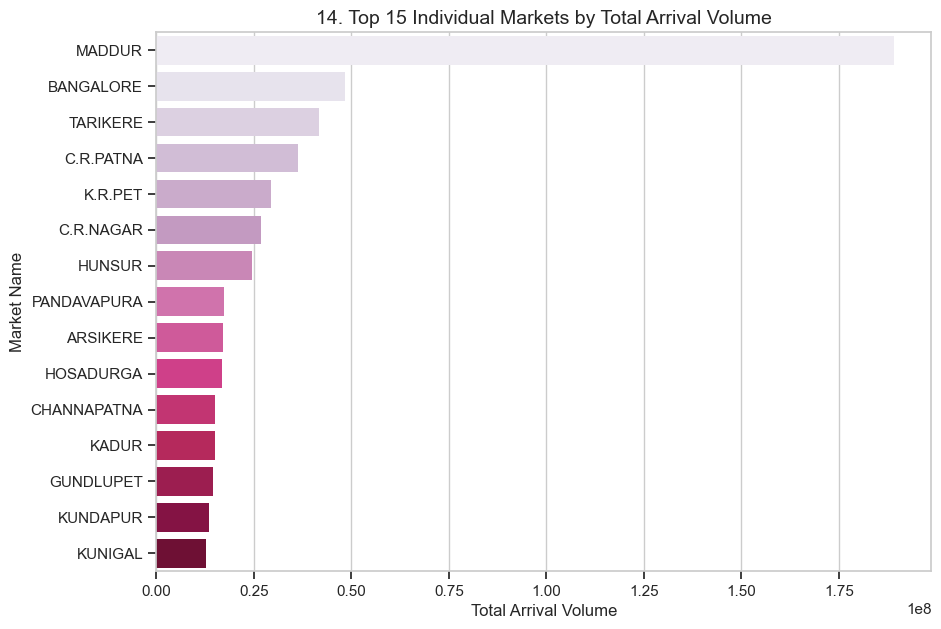

In [122]:
df_market_arrival_pd = df_cleaned.groupby('Market Name')['Arrival_float'].sum().sort_values(ascending=False).head(15).reset_index(name='Total Arrival')

plt.figure(figsize=(10, 7))
sns.barplot(data=df_market_arrival_pd, x="Total Arrival", y="Market Name", palette="PuRd")
plt.title("14. Top 15 Individual Markets by Total Arrival Volume", fontsize=14)
plt.xlabel("Total Arrival Volume")
plt.ylabel("Market Name")
plt.show()

# 15. Number of Transactions (Records) Reported by Month

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\3321607860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_count_pd, x="Month", y="Record Count", palette="pastel")


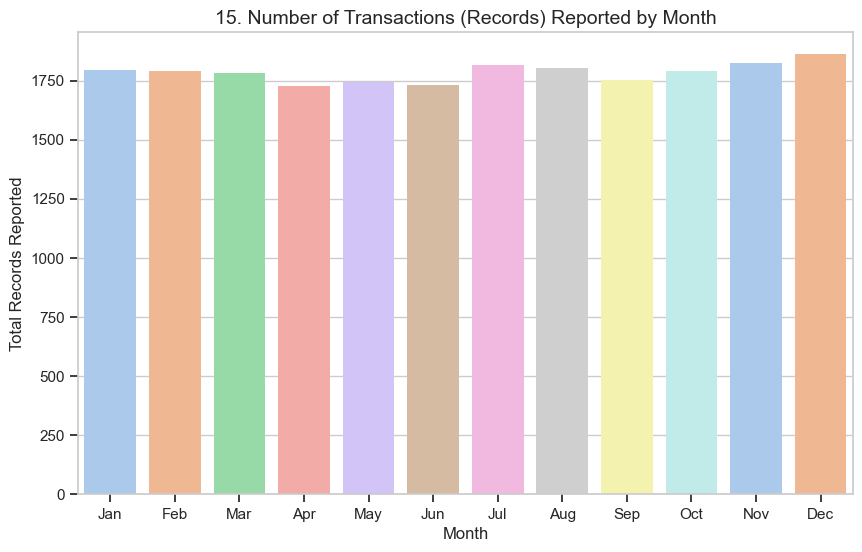

In [123]:
df_count_pd = df_cleaned.groupby('Month').size().reindex(month_order).reset_index(name='Record Count')
df_count_pd['Month'] = pd.Categorical(df_count_pd['Month'], categories=month_order, ordered=True)
df_count_pd = df_count_pd.sort_values('Month')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_count_pd, x="Month", y="Record Count", palette="pastel")
plt.title("15. Number of Transactions (Records) Reported by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Records Reported")
plt.show()

# 16. Unit Usage by Top 10 Commodity (Record Count)

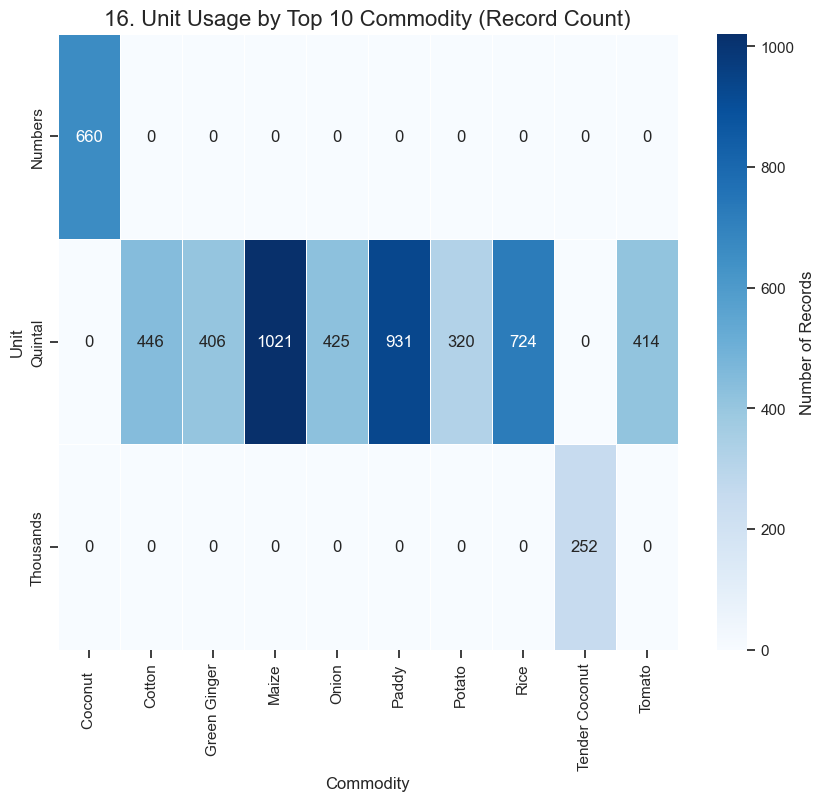

In [124]:
top_10_units = df_cleaned['Unit'].str.strip().value_counts().head(10).index.tolist()
df_matrix_pd = df_cleaned[df_cleaned['Commodity'].isin(top_10_commodities)].copy()
df_matrix_pd['Unit'] = df_matrix_pd['Unit'].str.strip()
df_matrix_pivot = df_matrix_pd[df_matrix_pd['Unit'].isin(top_10_units)].pivot_table(
    index='Unit', columns='Commodity', aggfunc='size', fill_value=0
)

plt.figure(figsize=(10, 8))
sns.heatmap(df_matrix_pivot, cmap='Blues', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Records'})
plt.title("16. Unit Usage by Top 10 Commodity (Record Count)", fontsize=16)
plt.show()

# 17. Average Arrival Volume (Transaction Size) by Month

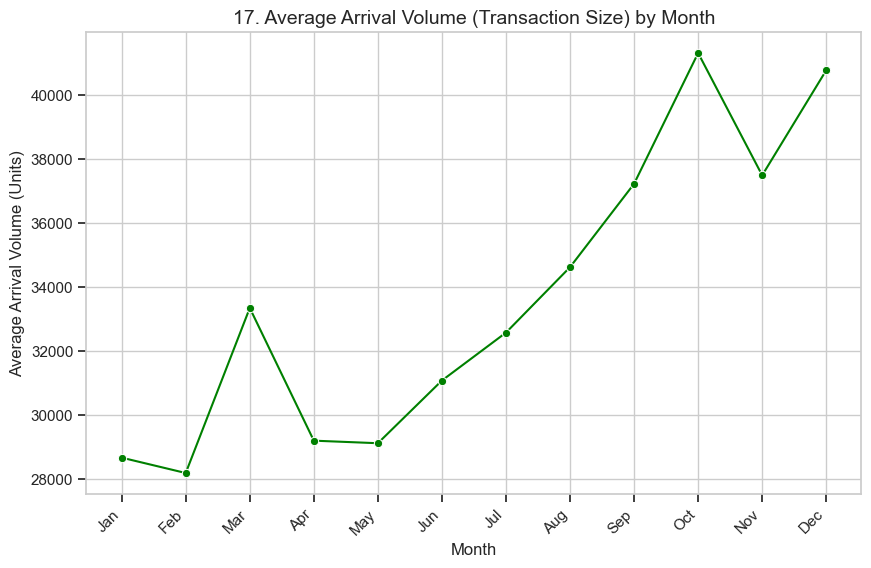

In [125]:
df_avg_monthly_pd = df_cleaned.groupby('Month')['Arrival_float'].mean().reindex(month_order).reset_index(name='Average Arrival')
df_avg_monthly_pd['Month'] = pd.Categorical(df_avg_monthly_pd['Month'], categories=month_order, ordered=True)
df_avg_monthly_pd = df_avg_monthly_pd.sort_values('Month')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_avg_monthly_pd, x='Month', y='Average Arrival', marker='o', color='green')
plt.title("17. Average Arrival Volume (Transaction Size) by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Arrival Volume (Units)")
plt.xticks(rotation=45, ha='right')
plt.show()

# 18. Top 5 Commodities by Average Arrival Volume (Transaction Size)

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\4029526731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avg_top5_pd, x="Commodity", y="Average Arrival", palette="rocket")


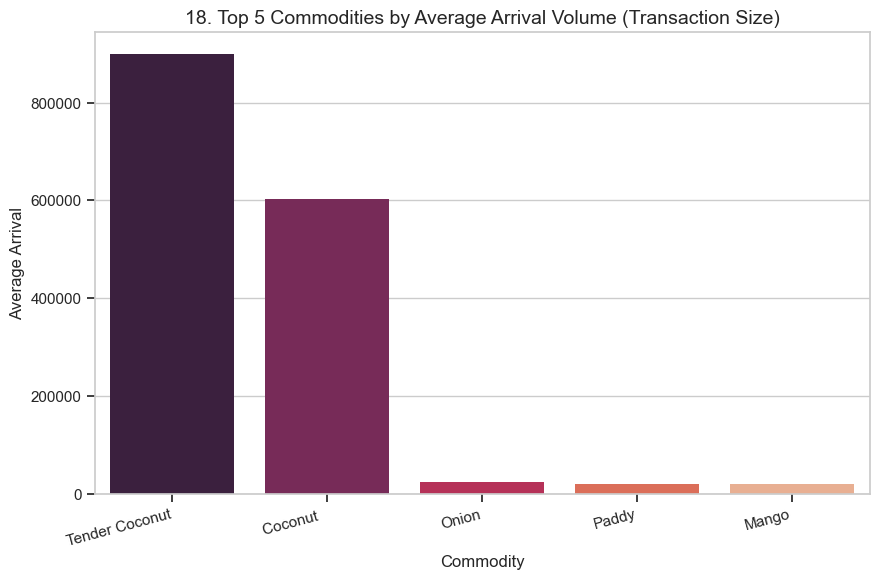

In [126]:
df_avg_top5_pd = df_cleaned.groupby('Commodity')['Arrival_float'].mean().sort_values(ascending=False).head(5).reset_index(name='Average Arrival')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_avg_top5_pd, x="Commodity", y="Average Arrival", palette="rocket")
plt.title("18. Top 5 Commodities by Average Arrival Volume (Transaction Size)", fontsize=14)
plt.xticks(rotation=15, ha='right')
plt.show()

# 19. Top 10 Districts for Arecanut Arrival Volume

C:\Users\rshiv\AppData\Local\Temp\ipykernel_19920\3111551538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_areca_pd, x='Total Arrival', y='District Name', palette="Reds_r")


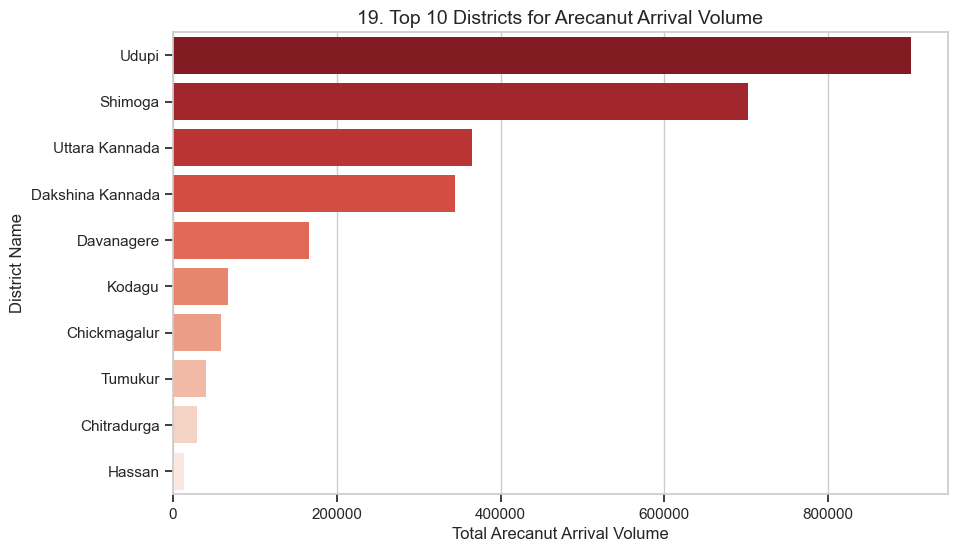

In [127]:
df_areca_pd = df_cleaned[df_cleaned['Commodity'] == "Arecanut"].groupby('District Name')['Arrival_float'].sum().sort_values(ascending=False).head(10).reset_index(name='Total Arrival')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_areca_pd, x='Total Arrival', y='District Name', palette="Reds_r")
plt.title("19. Top 10 Districts for Arecanut Arrival Volume", fontsize=14)
plt.xlabel("Total Arecanut Arrival Volume")
plt.ylabel("District Name")
plt.show()

# 20. Monthly Trend: Arecanut vs. Coconut Arrival Volume

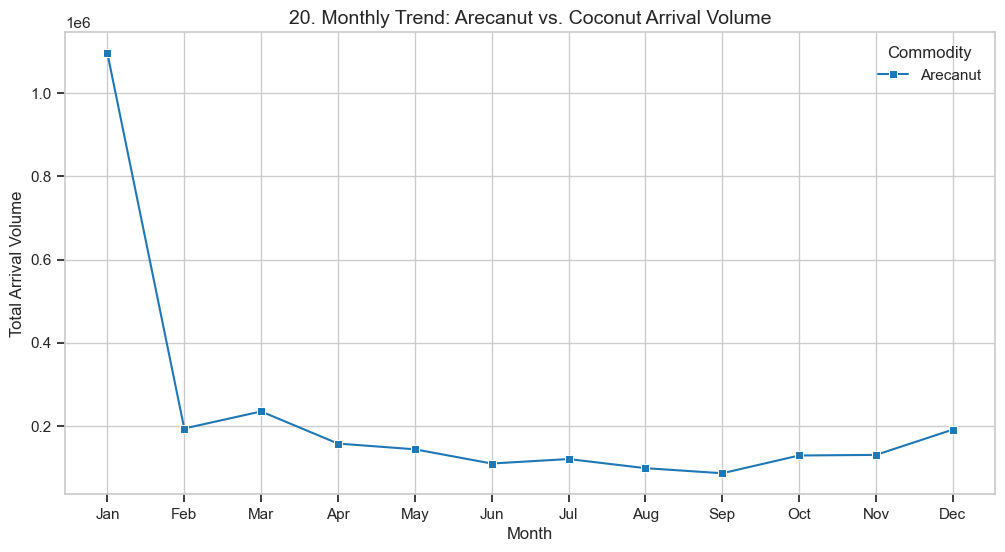

In [128]:
df_comp_pd = df_cleaned[df_cleaned['Commodity'].isin(["Arecanut", "Coconut"])].groupby(['Month', 'Commodity'])['Arrival_float'].sum().reindex(month_order, level=0).reset_index(name='Total Arrival')
df_comp_pd['Month'] = pd.Categorical(df_comp_pd['Month'], categories=month_order, ordered=True)
df_comp_pd = df_comp_pd.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comp_pd, x='Month', y='Total Arrival', hue='Commodity', marker='s')
plt.title("20. Monthly Trend: Arecanut vs. Coconut Arrival Volume", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Arrival Volume")
plt.show()

In [129]:
df_feat_equivalent_cols = df[[
    'District Name', 
    'Commodity', 
    'Year', 
    'Month', 
    'Arrival', 
    'Unit'
]]

print("--- Commodity Market Data (All Years - Top 20 Records) ---")
print(df_feat_equivalent_cols.head(20))

--- Commodity Market Data (All Years - Top 20 Records) ---
   District Name      Commodity  Year Month  Arrival        Unit
0      Bagalakot          Bajra  2012   Jan      242  Quintal   
1      Bagalakot         Bull    2012   Jan       65    Numbers 
2      Bagalakot          Cow    2012   Jan      151    Numbers 
3      Bagalakot         Goat    2012   Jan      492    Numbers 
4      Bagalakot      Groundnut  2012   Jan      364  Quintal   
5      Bagalakot   He Baffalo    2012   Jan       41    Numbers 
6      Bagalakot          Jowar  2012   Jan        4  Quintal   
7      Bagalakot          Maize  2012   Jan    21669  Quintal   
8      Bagalakot           Ox    2012   Jan      233    Numbers 
9      Bagalakot          Ram    2012   Jan      180    Numbers 
10     Bagalakot          Sajje  2012   Jan     4649  Quintal   
11     Bagalakot  She Baffalo    2012   Jan      290    Numbers 
12     Bagalakot     She Goat    2012   Jan     2948    Numbers 
13     Bagalakot        Sheep  

## Project Summary

- PySpark facilitated scalable data cleaning, transformation, sampling, and aggregation on this market arrivals dataset.
- Major commodities (e.g., maize, groundnut, livestock) and high-activity districts/markets identified.
- RDD and DataFrame operations were used for sampling and analytics to demonstrate core big data techniques.
- The workflow matches the pedagogical steps for Big Data Analytics using PySpark.
